In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd
#How are we doing lately

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,-0.619726,0.528773,1.438575
2016-07-01 00:00:01,0.143076,0.122012,1.082410
2016-07-01 00:00:02,-1.318533,0.655047,-0.130672
2016-07-01 00:00:03,-0.340106,-0.417421,2.633482
2016-07-01 00:00:04,-1.689601,-2.450769,1.562235


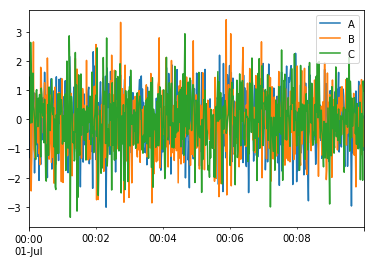

In [4]:
df.plot()

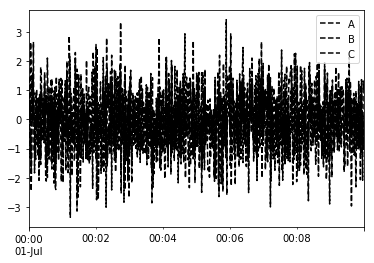

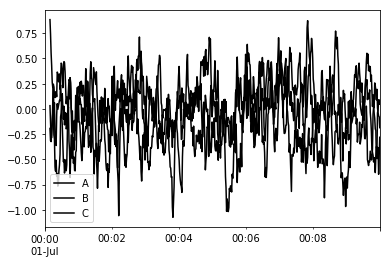

In [5]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [6]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Users/anshulgupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,-0.212898,0.311834,1.248620
2016-07-01 00:00:02,-0.631600,0.441808,0.726285
2016-07-01 00:00:03,-0.543550,0.182265,1.302382
2016-07-01 00:00:04,-0.837656,-0.493439,1.369067
2016-07-01 00:00:05,-0.828254,-0.656454,1.032002
2016-07-01 00:00:06,-0.429705,-0.210688,0.825918
2016-07-01 00:00:07,-0.349794,-0.178277,0.970138
2016-07-01 00:00:08,-0.165722,0.327223,0.876147
2016-07-01 00:00:09,0.016465,0.097822,0.781733


In [7]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [8]:
df.head()

,A,B,C,D
2016-06-06,0.291324,-1.003425,0.758298,-0.003897
2016-06-07,0.714039,0.053897,-0.627252,0.163777
2016-06-08,1.366234,1.239313,2.873781,0.093840
2016-06-09,0.289010,-0.113036,-1.404670,1.912080
2016-06-10,1.746874,-1.068563,0.943370,-0.799296


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a570898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a79d0b8>], dtype=object)

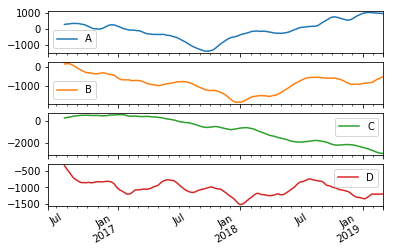

In [9]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [10]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.915107,0.418300,1.382781,1.314001


In [11]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


In [12]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,B
1,0.50
2,1.00
3,1.00
4,1.75


In [13]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?
###Exapnding window is the mean of the data whereas rolling window is where we
####give the size of the window calculate upto that point.So Expanding window
###is more significant

In [14]:
# EWMA
# Why use EWMA?
#EWMA(Exponential Weighted Moving Averages) takes a noisy value replaces 
#each value with average value of the neighbourhood so it acts like a 
#smoothing value so you donot loose any information

In [15]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [16]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [24]:
from pandas_datareader import data as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader("F", 'google', start, end)

In [25]:
f.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-19,12.12,12.33,12.06,12.11,41175453
2016-09-20,12.09,12.19,11.96,12.00,37820775
2016-09-21,12.08,12.11,12.01,12.09,32934639
2016-09-22,12.17,12.29,12.16,12.18,36136234
2016-09-23,12.12,12.22,12.12,12.17,18993510


In [27]:
f

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-19,12.12,12.33,12.06,12.11,41175453
2016-09-20,12.09,12.19,11.96,12.00,37820775
2016-09-21,12.08,12.11,12.01,12.09,32934639
2016-09-22,12.17,12.29,12.16,12.18,36136234
2016-09-23,12.12,12.22,12.12,12.17,18993510
2016-09-26,12.12,12.12,12.00,12.01,26758623
2016-09-27,12.02,12.09,11.93,11.98,28965759
2016-09-28,12.02,12.09,11.96,12.09,29341515
2016-09-29,12.03,12.12,11.95,11.97,23397424


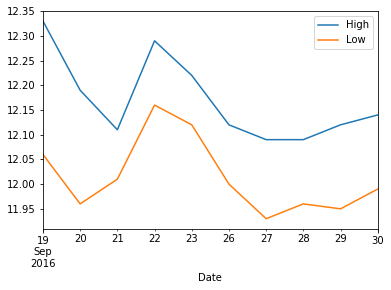

In [28]:
f['2016-08':'2016-09'][['High', 'Low']].plot()

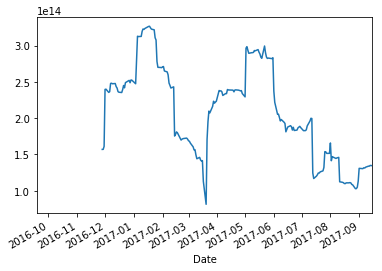

In [30]:

r = f.rolling(50).var()['Volume'].plot()

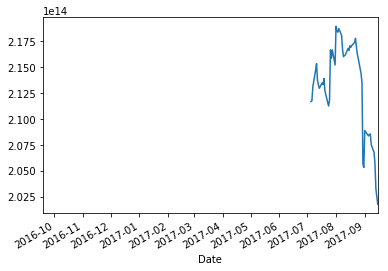

In [31]:
r = f.rolling(200).var()['Volume'].plot()

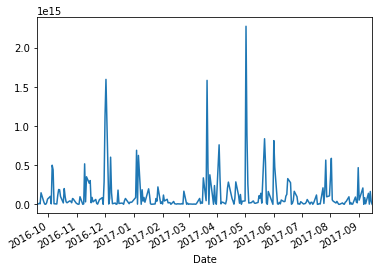

In [32]:
r = f.rolling(2).var()['Volume'].plot()

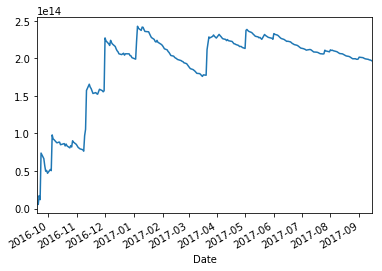

In [33]:
r = f.expanding().var()['Volume'].plot()

In [34]:

len(f[f.Close > f.Open])

109

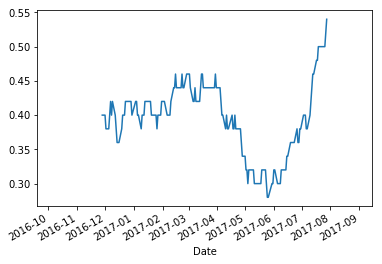

In [35]:

f['DayGain'] = f.Close - f.Open
f.rolling(window=50)['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

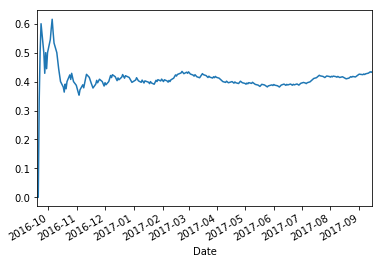

In [36]:
f.expanding()['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

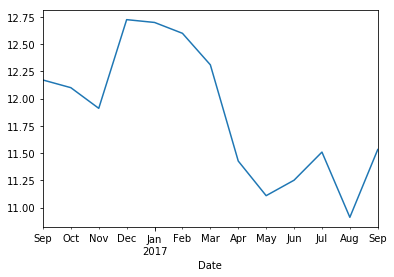

In [37]:

f.resample('M')['High'].mean().plot()

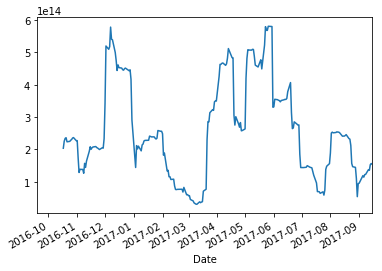

In [39]:

volume = f.Volume
volume_lagged = f.Volume.shift()
diffed_volume = volume - volume_lagged
diffed_volume.rolling(window=20).var().plot()

In [41]:

pd.DataFrame({'real':f.Volume, 'lagged':f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.391729
real,0.391729,1.000000
